<a href="https://colab.research.google.com/github/LincolnVS/ImersaoDadosAlura/blob/main/Aula_03_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O notebook da Aula 3 foi separado em duas etapas:
- [Explicações e Aula Alura](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_03.ipynb)
- [Desafios e Playground](https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/Aula_03_Desafios.ipynb)

*Obs:* Esse é o notebook de **Desafios e Playground**

### Importando dados

In [107]:
import pandas as pd
pd.set_option('display.max_columns', 15) #mostra apenas 15 colunas quando manda plotar tudo (esse dataset tem mais de 800)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use(style='seaborn-darkgrid')#('fivethirtyeight')
sns.set()

url_dados = 'https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

In [108]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Desafios 

- *Desafio 01*: Criar tabelas de frequência com pandas.groupby()
- *Desafio 02*: Normalizar o crosstab pela coluna.
- *Desafio 03*: Explorar outros agregadores.
- *Desafio 04*: Explorar o melt.
- *Desafio 05*: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 
- *Desafio 06*: Estudar o código que plota a matriz de correlação (heatmap)
- *Desafio 07*: Resumo do que você aprendeu com os dados

## Desafio 1

**Criar tabelas de frequência com pandas.groupby()**

In [3]:
#Tabela de frequencia com crosstab
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [39]:
#Tabela de frequencia com groupby e unstack
dados.groupby(['tratamento','dose','tempo']).size().unstack(0)

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [38]:
#Tabela de frequencia com groupby e agg
dados.groupby(by=['dose','tempo']).agg(
    com_controle=("tratamento", lambda x: (x=='com_controle').sum()),
    com_droga=("tratamento", lambda x: (x=='com_droga').sum()),
    )

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [43]:
#Tabela de frequencia usando pivot_table
dados.pivot_table(index=['dose', 'tempo'], columns='tratamento', aggfunc='size')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [41]:
#Tabela de frequencia com groupby e value_counts
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

## Desafio 2

**Normalizar o crosstab pela coluna.**

- ` normalize = 'index'` divides each cell by the sum of its row
- ` normalize = 'columns'`  divides each cell by the sum of its column
- ` normalize = True`  divides each cell by the total of all cells in the table

[referência](https://stackoverflow.com/a/57710608)

In [46]:
#Tabela de frequencia com crosstab normalizado total
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [51]:
#Tabela de frequencia com crosstab normalizado por linha
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [50]:
#Tabela de frequencia com crosstab normalizado por coluna
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 3

**Explorar outros agregadores.**

Pandas possui diversas formas de resumir os dados em valores (agregar). Algumas formas:

|         Função         |                        Descrição                        |
|:----------------------:|:-------------------------------------------------------:|
| count()                | Conta os itens (numero total)                           |
| first(), last()        | Primeiro / ultimo valor                                 |
| mean(), median()       | Média / mediana                                         |
| min(), max()           | minimo / maximo                                         |
| std(), var()           | Desvio padrão / variancia                               |
| mad()                  | Desvio absoluto<br>(Mean absolute deviation)            |
| prod()                 | Multiplicação de todos os valores                       |
| sum()                  | Soma de todos os valores                                |
| describe() [numéricos] | count, mean, std, min, max<br>e quartil (25%,50% e 75%) |
| describe() [objetos]   | count, unique, top, e freq.                             |
| describe() [outros]    | count e top                                             |

In [63]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.1636     1.0620
     48          -0.6696     0.6280
     72          -0.6723     0.0743
D2   24          -1.3200     2.0440
     48           0.4860    -0.0630
     72           0.7344    -0.3254

In [66]:
dados.groupby(by=['dose','tempo','tratamento'])[['g-0']].agg(['mean','min','max'])

g-0               
                             mean    min     max
dose tempo tratamento                           
D1   24    com_controle -0.251760 -2.370   3.226
           com_droga     0.367996 -5.183   9.908
     48    com_controle -0.122773 -3.276   3.423
           com_droga     0.412469 -5.420  10.000
     72    com_controle -0.295271 -2.086   2.584
           com_droga     0.286250 -5.261   9.355
D2   24    com_controle  0.010754 -2.135   2.601
           com_droga     0.115253 -5.233   7.167
     48    com_controle  0.013174 -4.859   4.335
           com_droga     0.214480 -4.567  10.000
     72    com_controle  0.070250 -1.909   4.670
           com_droga     0.253439 -5.513  10.000

## Desafio 4

**Explorar o melt.**

In [67]:
#A função .melt constrói uma nova coluna com todos os valores. Além disso, muda o indixe da tabela.
dados.melt(id_vars=['tempo','dose', 'tratamento'], value_vars=['g-0', 'g-1'], var_name='variável', value_name='valor')

,tempo,dose,tratamento,variável,valor
0,24,D1,com_droga,g-0,1.0620
1,72,D1,com_droga,g-0,0.0743
2,48,D1,com_droga,g-0,0.6280
3,48,D1,com_droga,g-0,-0.5138
4,72,D2,com_droga,g-0,-0.3254
...,...,...,...,...,...
47623,24,D2,com_droga,g-1,-0.0636
47624,24,D2,com_droga,g-1,0.3478
47625,48,D2,com_controle,g-1,0.3756
47626,24,D1,com_droga,g-1,0.2324


## Desafio 5

**Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.**

Dica Vanessa no discord: 
    
- Podemos pensar que os genes que têm o mesmo comportamento em todos os tipos celulares, podem estar relacionados a funções vitais que toda célula precisa exercer. E agora é só tentar entender por que alguns genes são regulados de uma maneira em certos tipos celulares, mas em outros não?

[link de apoio](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5990023/)

**Minha resposta:**
Considerando que ter o comportamento do gene de uma forma na célula, diferencia as funções da mesma. Comportamentos desses genes em células diferentes, pode indicar uma função específica, visto que esse comportamento muda conforme a célula que se encontra.  

In [113]:
#Exemplo em codigo
corr = pd.concat([dados.loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

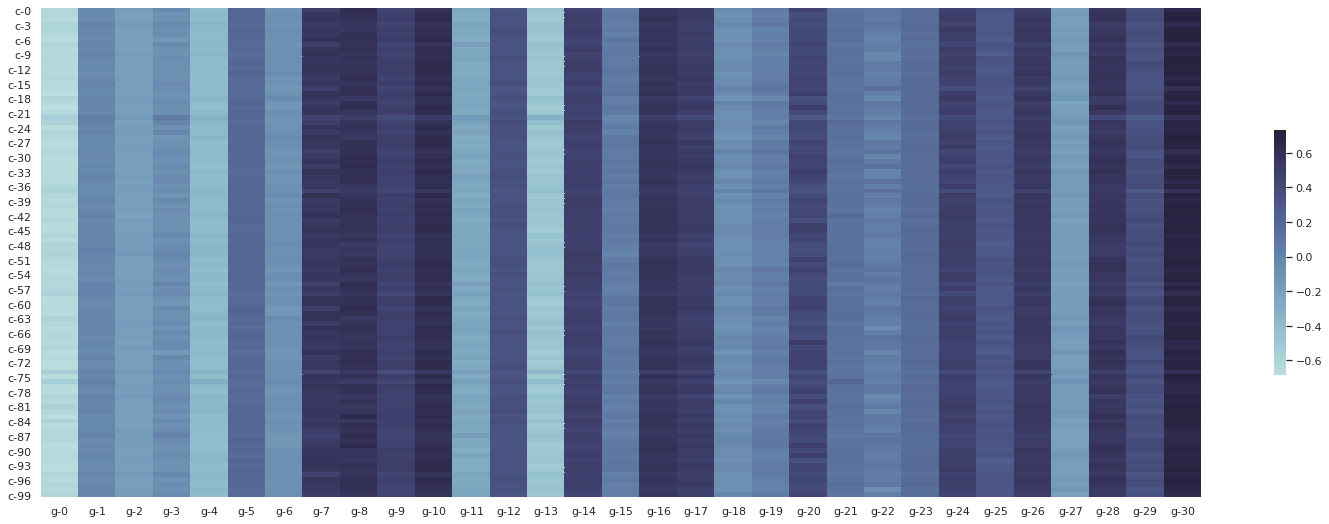

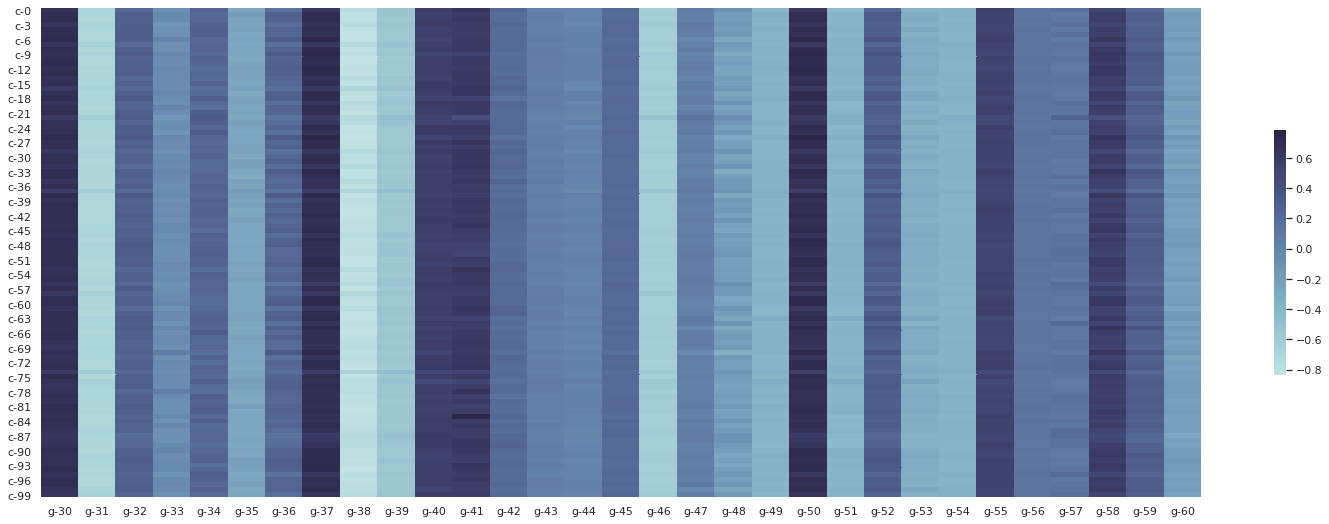

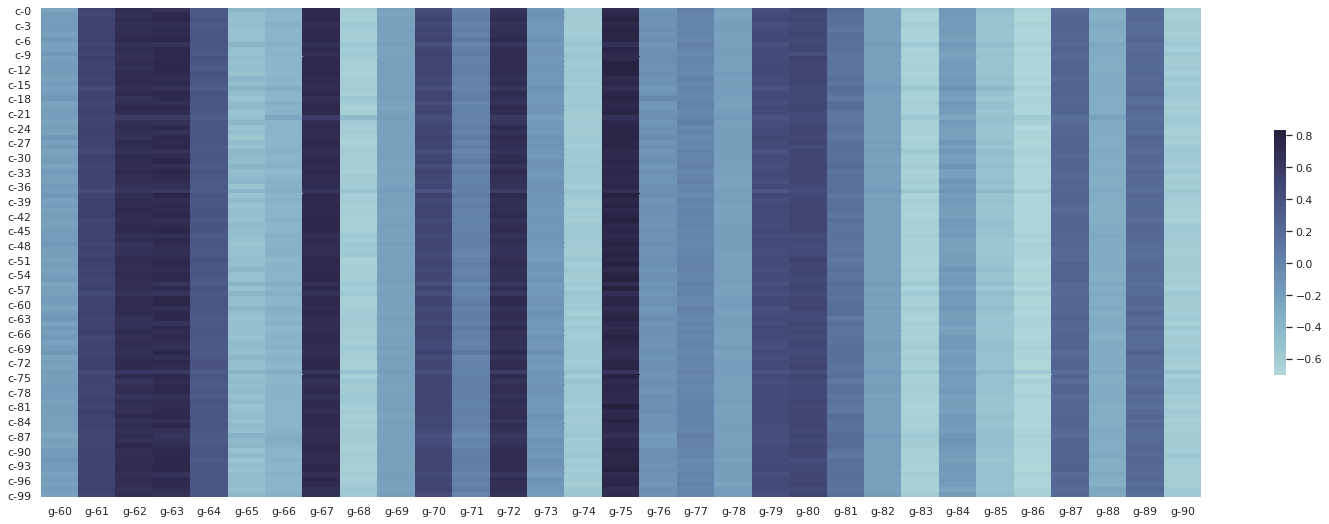

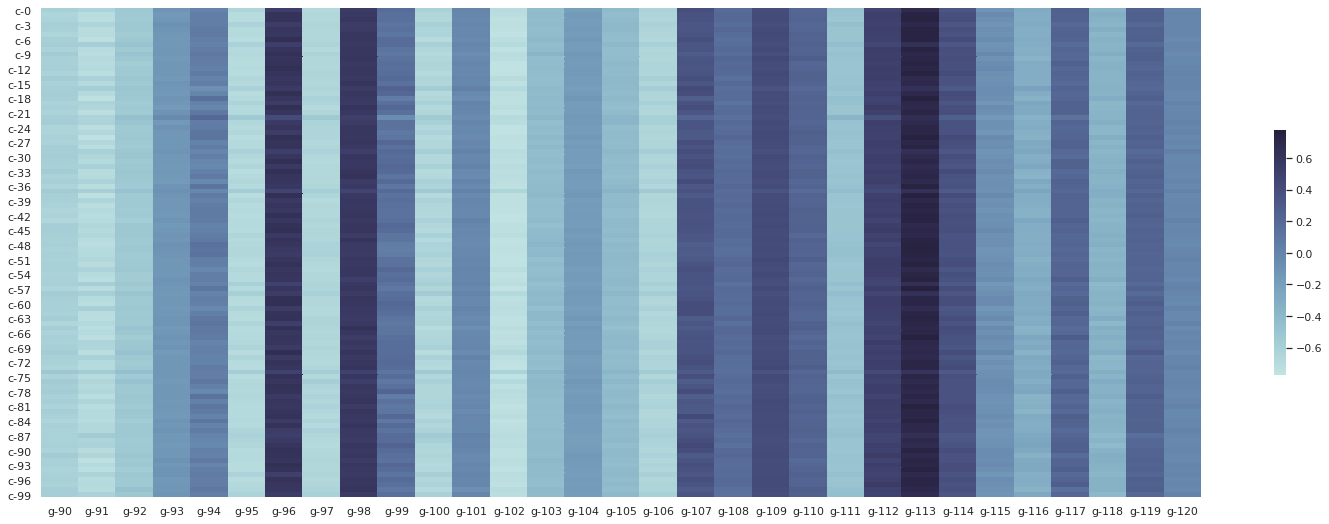

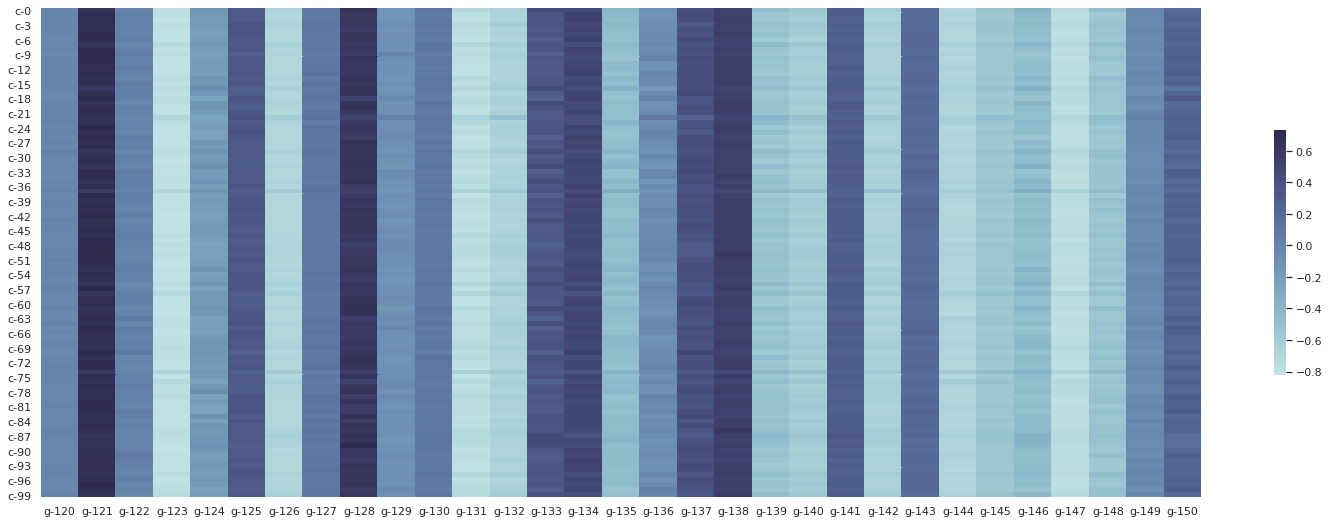

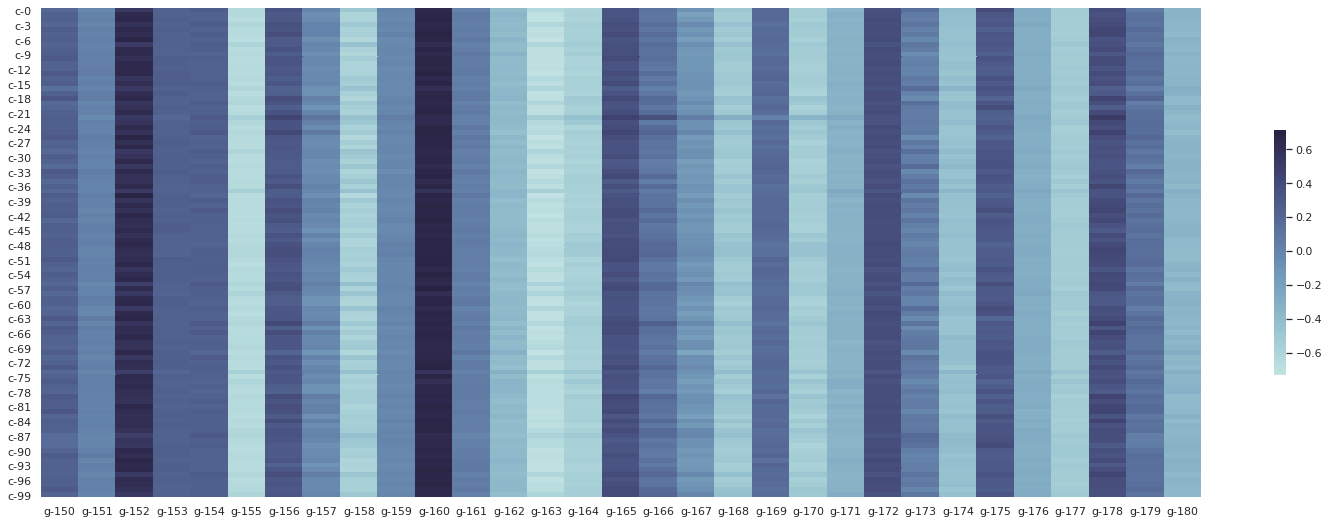

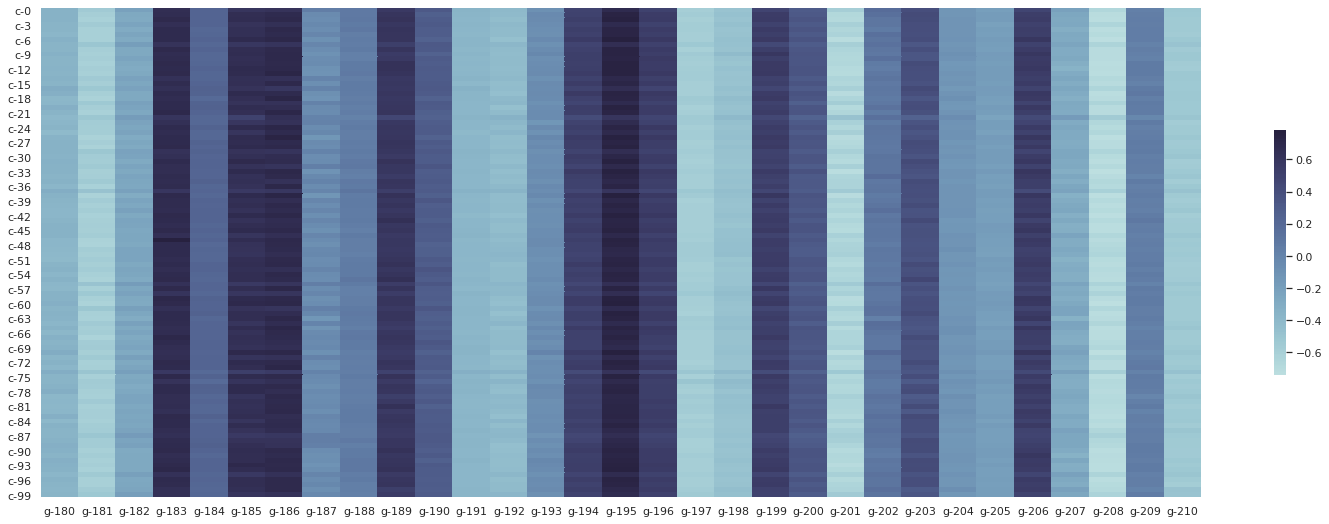

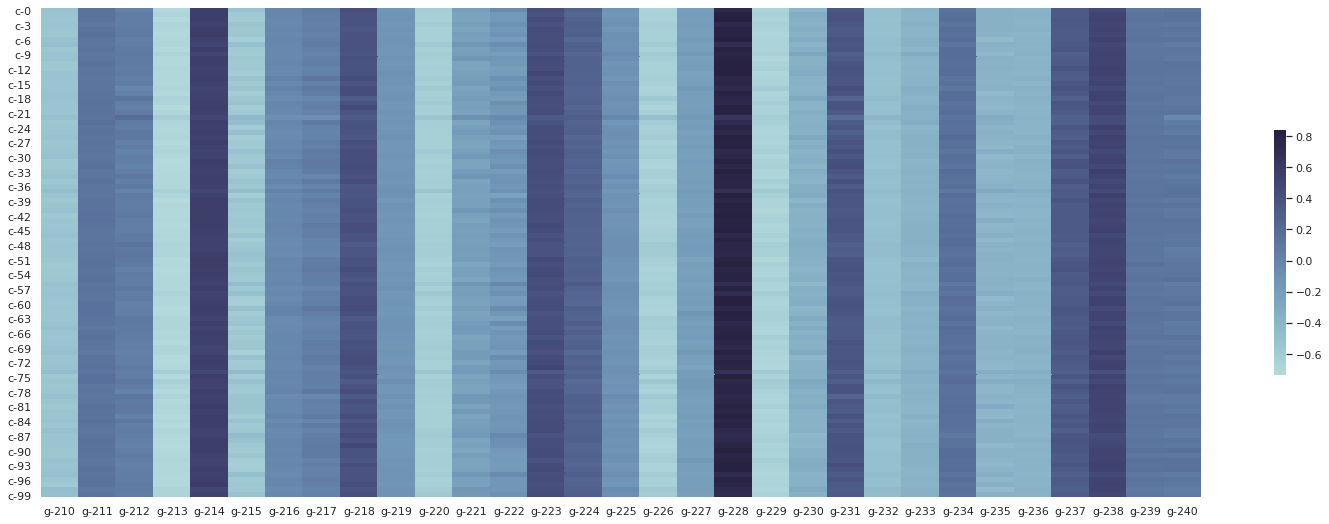

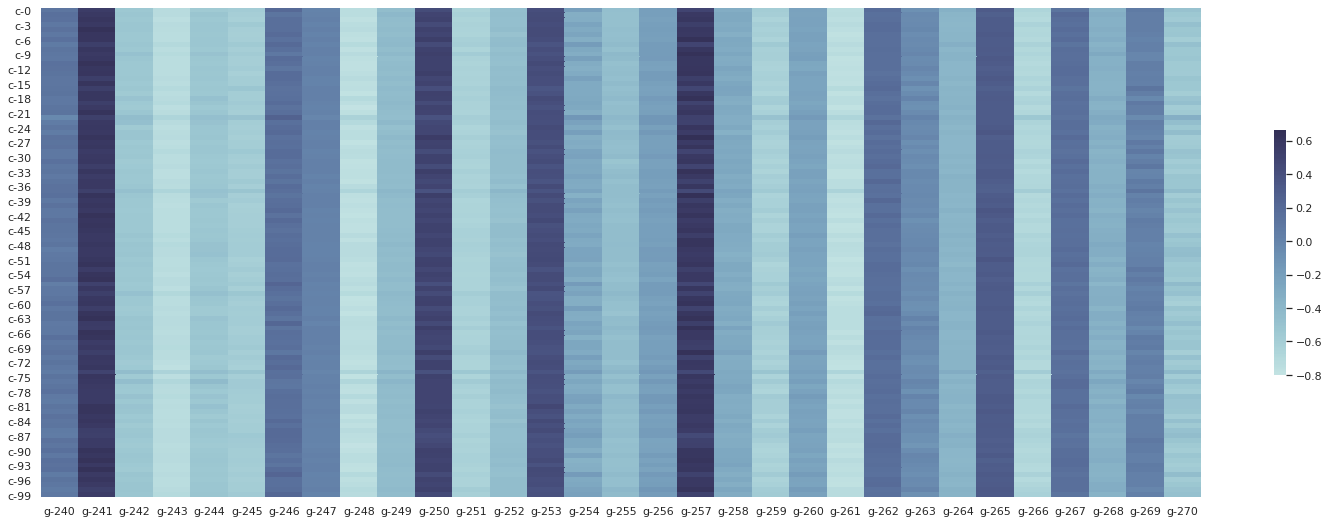

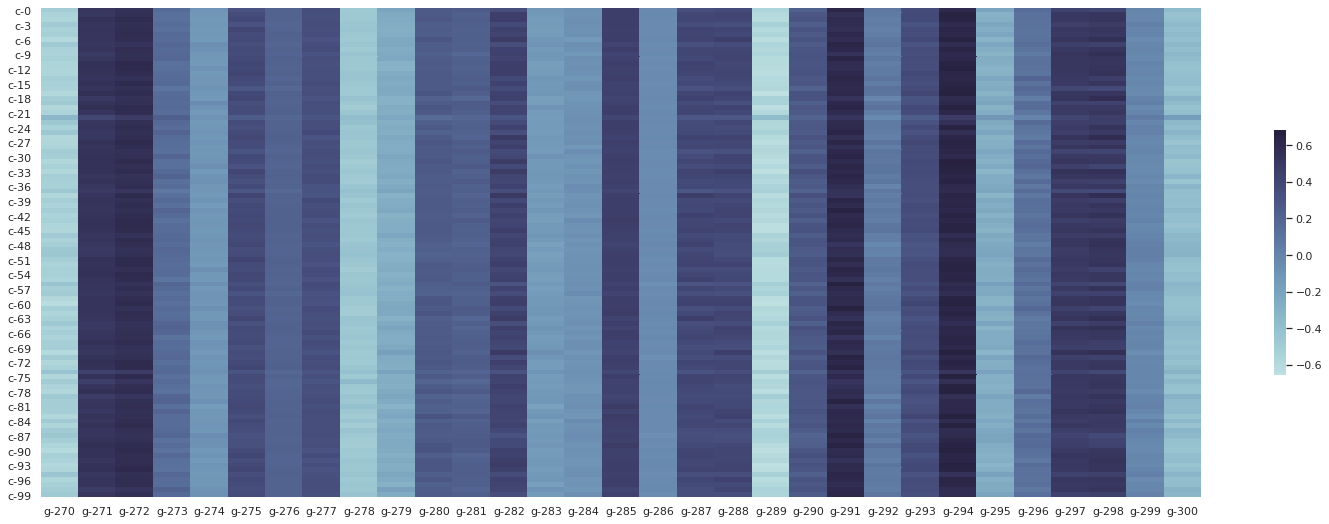

In [142]:

for a in range(10):
  corr_to_plot = corr.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

Teste apenas genes que estão no com controle

In [140]:
#Exemplo em codigo
corr_com_controle = pd.concat([dados.query('tratamento == "com_controle"').loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

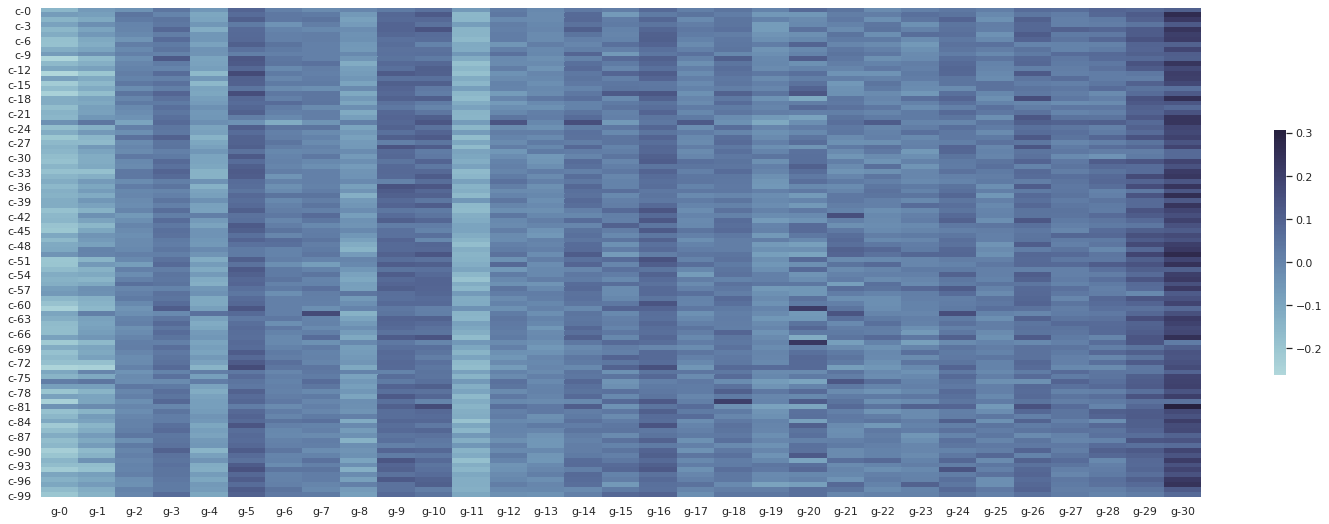

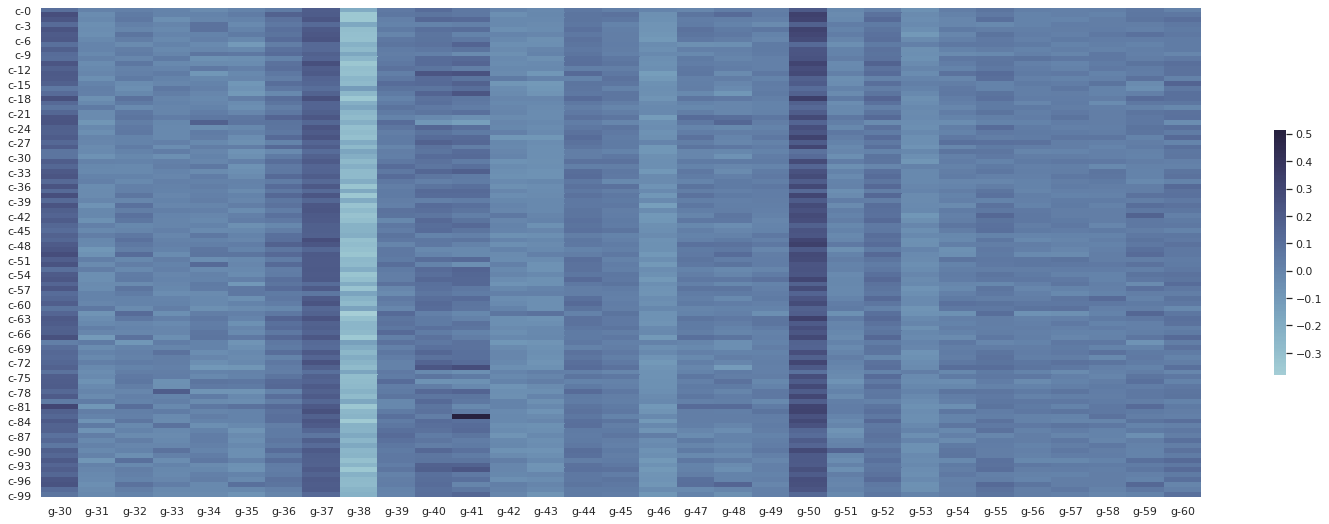

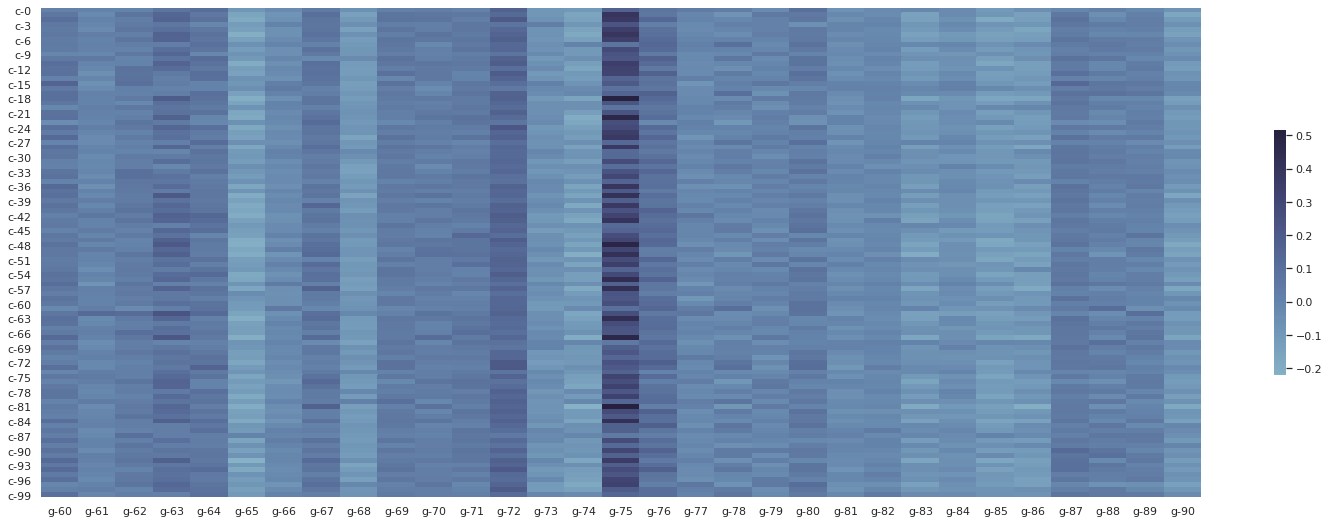

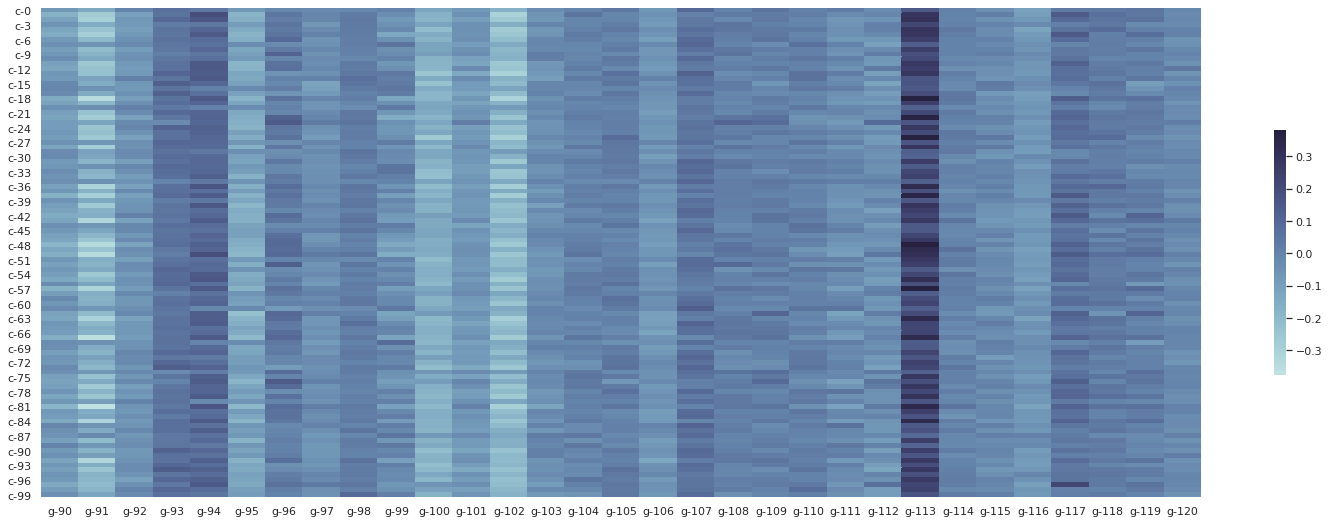

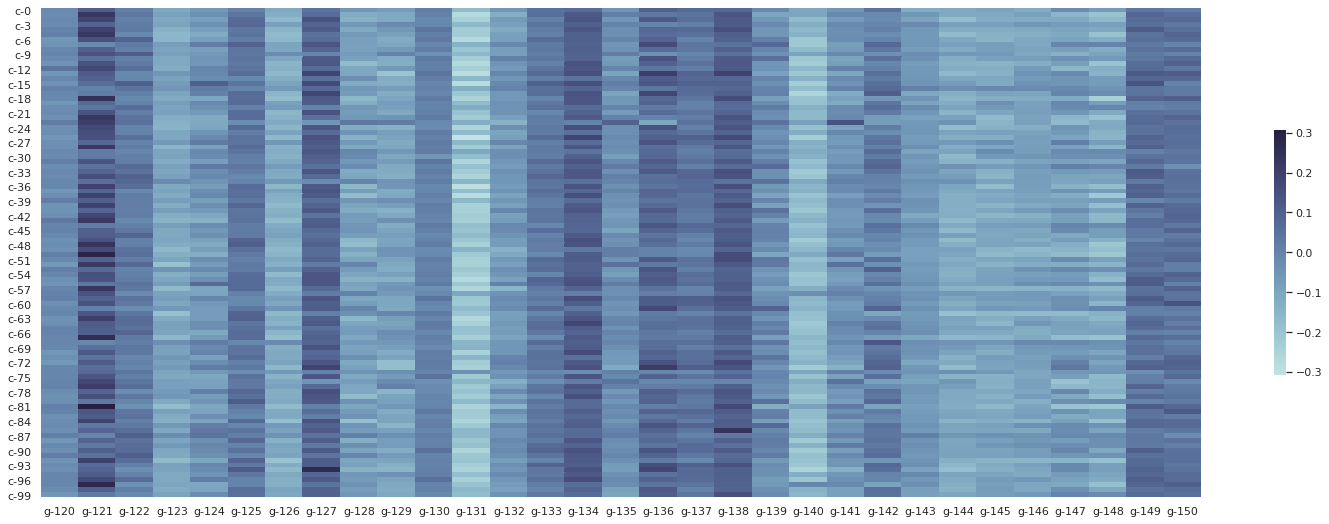

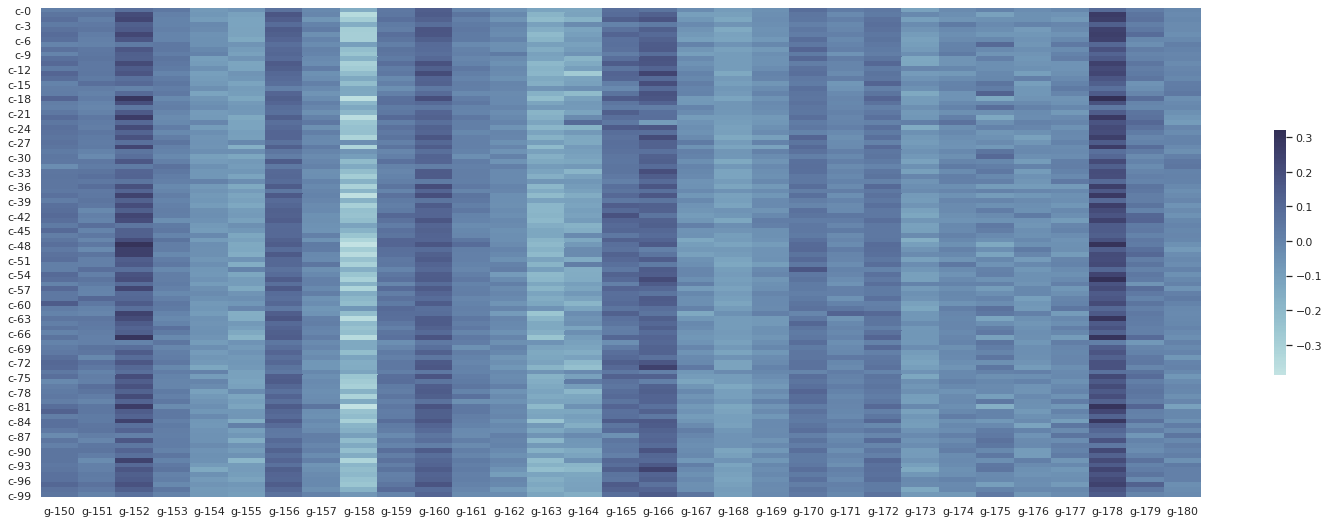

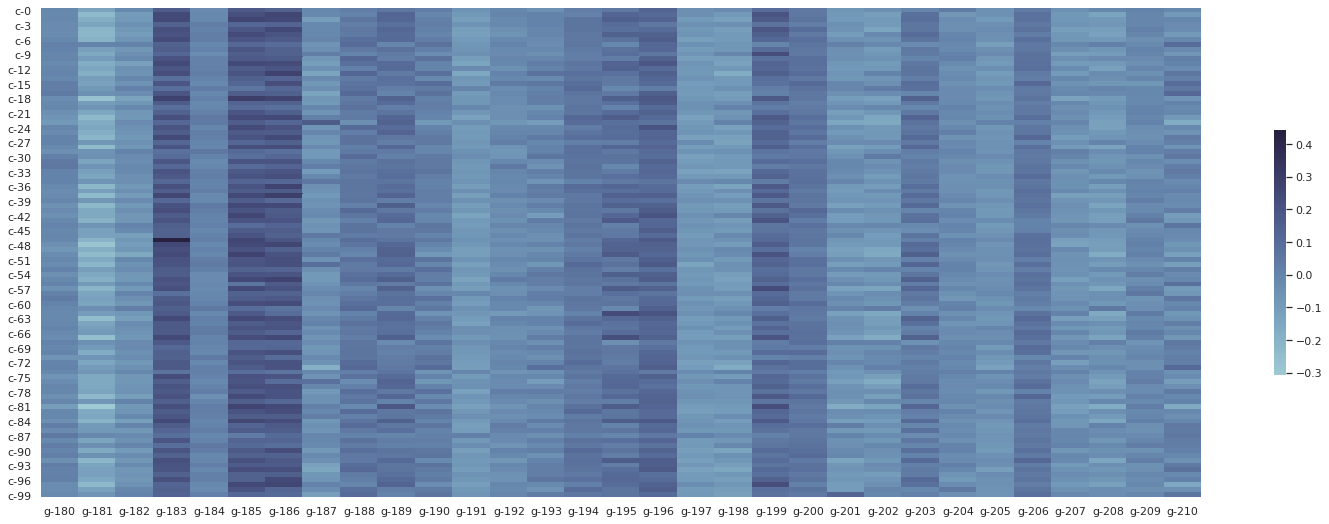

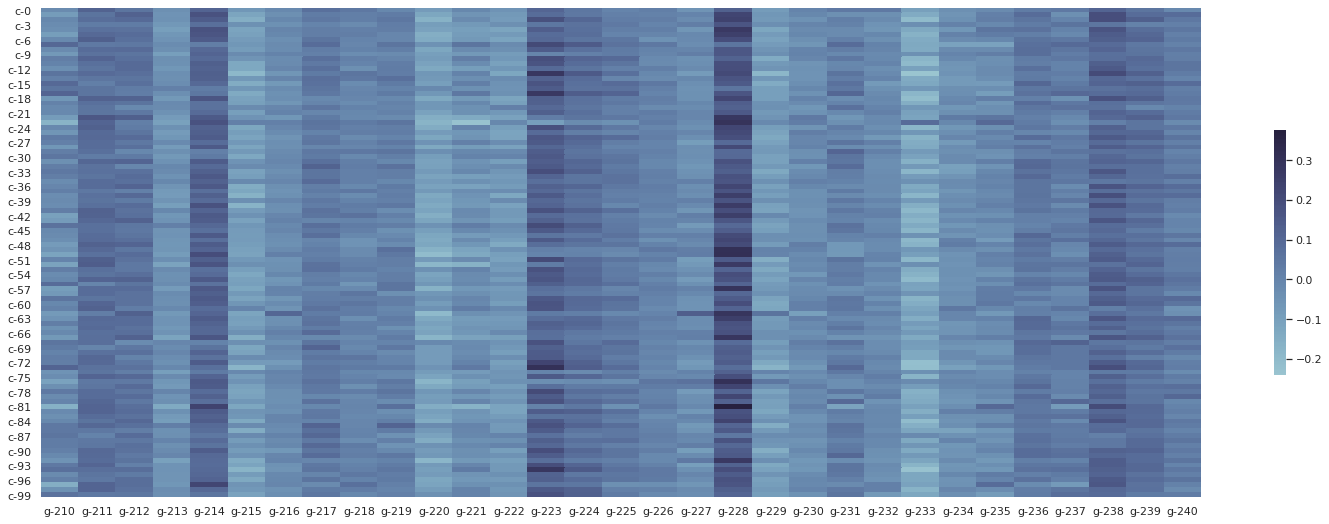

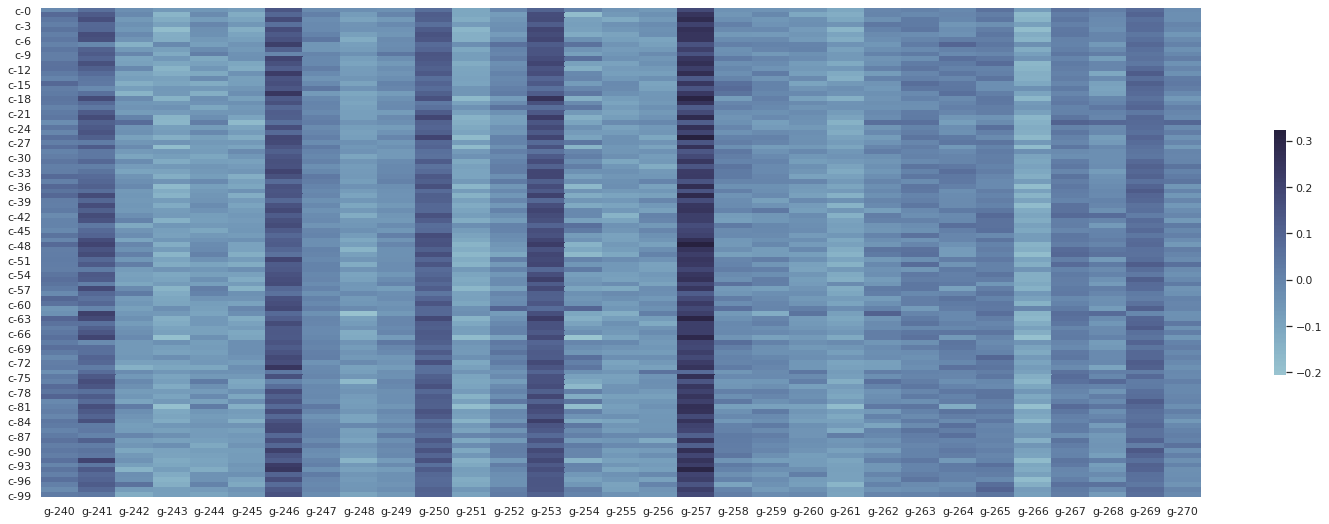

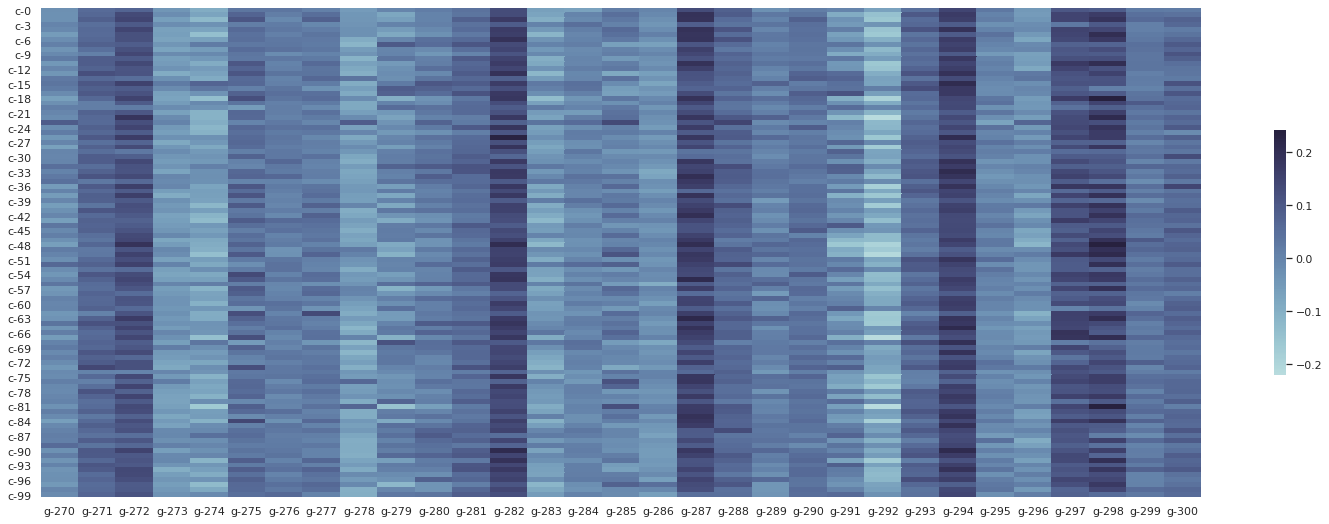

In [141]:
for a in range(10):
  corr_to_plot = corr_com_controle.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

## Desafio 6

**Estudar o código que plota a matriz de correlação (heatmap)**

o HeatMap plota um gráfico de calor, onde as cores indicam o valor que corresponde as colunas x e y. 

O seguinte codigo foi utilizado em aula:

``` python
corr_celular = dados.loc[:,'g-0':'g-50'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
```

Nesse codigo, fazemos a correlação entre as primeiras 51 entre as variáveis, e posteriormente plotamos o grafico. O diferencial é que, cria-se uma mascara para não repetir informação, visto que quando comparamos correlação, se temos os mesmos valores para coluna e linha, os dados se repetem ao espelho da diagonal principal, e todos os valores da diagonal principal são 1. Exemplo: correlação_entre('c-0' e 'c-1') é igual a correlação_entre('c-1' e 'c-0').

In [135]:
corr_celular = dados.loc[:,'g-0':'g-50'].corr()

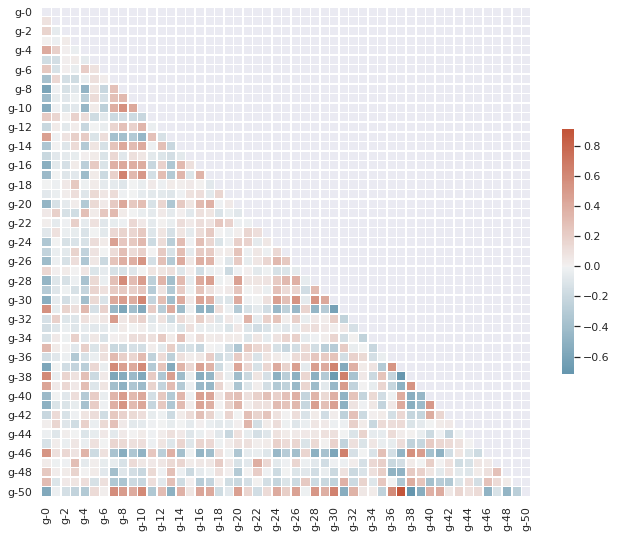

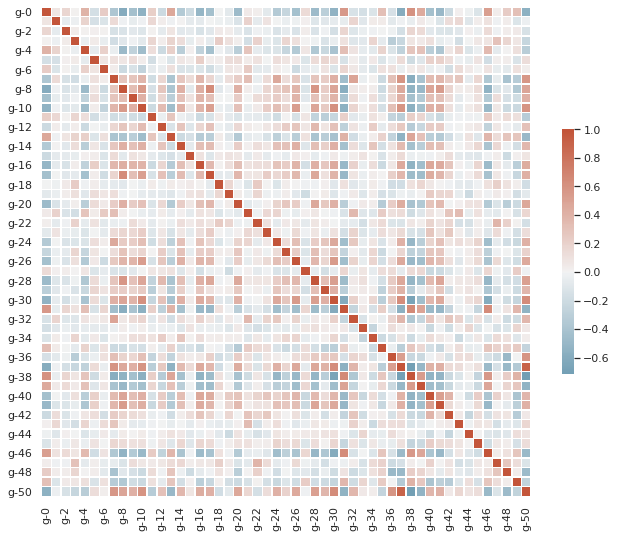

In [136]:
#Plot com mascara

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#Plot sem mascara
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafio 7

**Resumo do que você aprendeu com os dados**

1. Criamos tabela de frequencia com crosstable, groupby, pivot e melt.
2. Aprendemos alguns agg. (apara agrupar valores) (vide desafio 3)
3. Aprendemos a normalizar por coluna, e por linha
4. Aparentemente, um gene g, mantem uma corelação similar para todos os tipos celulares c. Por exemplo, o g-113 tem uma correlação alta com todos os c (do 0 ao 99). Esse comportamento se repete para praticamente todos os genes.